# Introducción

Este reporte contiene información referida a la carrera musical del artista Argentino Charly García. Previamente hemos consolidado todo su historial de canciones (tanto solistas como en bandas) en un archivo llamado resultado.txt cargado como 'df_charly'. Asimismo, utilizaremos para el análisis un archivo llamado Albums.xlsx que contiene una marca que indica la categoría de cada uno de los álbumes de Charly García y un último archivo que contiene el Top 99 de mejores canciones del artista. Toda la información ha sido obtenida de la popular plataforma musical Spotify. Luego de trabajar nuestro archivo incorporando toda esta información antes mencionada, nuestro data frame de trabajo queda de la siguiente manera:


In [1]:
options(jupyter.plot_scale=1)

#Instalamos los paquetes necesarios y los cargamos
list_of_packages <- c( "dplyr", "tibble", "ggplot2", "cowplot", "tidyr", "ggridges", "ggbeeswarm",
                      "GGally",  "plotly", "treemapify", "here",  "vcd", "colorspace", "corrplot",
                      "readxl", 'pastecs','kableExtra','IRdisplay'
                     )
new_packages <- list_of_packages[!(list_of_packages %in% installed.packages()[,"Package"])]
if(length(new_packages)) install.packages(new_packages)

suppressWarnings(suppressMessages(invisible(lapply(list_of_packages, library, character.only = TRUE))))

#Leemos el archivo de trabajo resultados.txt
PATH <- here('tp 2','Datos')
PATH_TP1 <- here('tp1', 'Datos')

df_charly<- read.delim(file.path(PATH, 'resultado.txt'),
                      header = TRUE, 
                     )

#Leemos el archivo que nos brindara la categoria de los albums
albums <- read_excel(
            path = file.path(PATH_TP1,"albums.xlsx")
                   )

#Nuestro primer archivo de trabajo tiene la siguiente estructura:
#head(df_charly)
#El segundo archivo que cuenta con la información de los albums es de la siguiente manera: 
#head(albums)
#Le agregamos al df_charly la información referida a la categoria de los albums. Ya no utilizaremos mas el dataframe de los albums ya que llevamos toda su información al df_charly.
#Por último tenemos el siguiente archivo del top 99:
cien_mejores <-  read_excel(file.path(PATH,"100 mejores.xlsx")) 

cien_mejores <- cien_mejores  %>% 
                select (-Artist,-Album,-"Date Added") %>% 
                rename(name = Track) %>% 
                mutate( name = as.factor(name),
                        Top_cien = "SI")

df_charly <- merge(x = cien_mejores, 
                  y = df_charly, 
                  by = "name",
                  all.x= FALSE,
                  all.y = TRUE
                 )  %>% 
            mutate(Top_cien = case_when( is.na(Top_cien) ~ 'NO',
                                        TRUE ~ 'SI'
                                       )
                  )

#head(cien_mejores)

#Ahora utilizaremos el 'name' para joinear esta tabla con el df_charly e incorporarle al mismo una marca que nos indique si la canción es parte de las 99 mejores o no. Validamos tambien la clave para entender si por diferencias en la escritura de la misma no podremos marcar las 99. Al no contar con una clave numerica del album en el archivo cien mejores, tendremos que usar el nombre, aunque no sea lo mas recomendado. Finalmente, encontramos las siguientes 11 canciones que se encuentran escritas de diferente manera por lo que serán excluidas y nos quedaremos con las 88 mejores, en vez de las 99 originales. 
#Validamos el archivo que tiene las canciones descargadas de spotify

lista_de_canciones <- distinct(tibble::as_tibble((df_charly$name))) 
lista_de_canciones <- lista_de_canciones  %>% 
                            merge(cien_mejores, 
                          by.x = "value",
                          by.y = 'name',
                          all.x= TRUE,
                          all.y = FALSE
                         )  %>% 
                         mutate(Top_cien = case_when( is.na(Top_cien) ~ 'NO',
                                                  TRUE ~ 'SI'
                                                 )
                                )

lista_de_canciones_si <- lista_de_canciones  %>% 
                        filter(Top_cien == 'SI')


top_cien_no_encontradas <- cien_mejores %>%
                         select(-Top_cien)  %>% 
                          merge(lista_de_canciones_si,
                                 by.y = "value",
                                  by.x = 'name',
                                  all.x= TRUE,
                                  all.y = FALSE)  %>% 
                         filter(is.na(Top_cien))  %>%  
                         select(-Top_cien)

lista_de_canciones_si <- lista_de_canciones  %>% 
                        filter(Top_cien == 'SI')


top_cien_no_encontradas <- cien_mejores %>%
                         select(-Top_cien)  %>% 
                          merge(lista_de_canciones_si,
                                 by.y = "value",
                                 by.x = 'name',
                                  all.x= TRUE,
                                  all.y = FALSE)  %>% 
                         filter(is.na(Top_cien))  %>%  
                         select(-Top_cien)

#Aqui arriba lo que hicimos fue intentar entender con cuantas de las 99 habiamos podido joinear. En top 100 no encontradas estan las 11 que no matchearon

# Agregamos al df charly la categoria  
albums <- albums  %>% 
         select(id, categoria)

df_charly <- df_charly  %>% 
            merge(albums, by.x = 'album_id', by.y = 'id', all.x = TRUE)  %>% 
            rename(categoria_album = categoria)



In [2]:
#Tabla 1
head(df_charly[1:2],2)  
head(df_charly[3:6],2) 
head(df_charly[7:11],2) 
head(df_charly[12:18],2) 
head(df_charly[19:22],2) 
head(df_charly[23:24],2) 

album_id,name
01SHGcb4X59QOezJ2MhqJx,Mr. Jones o Pequeña Semblanza de una Familia Tipo Americana
01SHGcb4X59QOezJ2MhqJx,Lunes Otra Vez


Top_cien,track_number,disc_number,album_name
SI,8,NA,Confesiones De Invierno
SI,6,NA,Confesiones De Invierno


album_artist,id,danceability,energy,key
Sui Generis,7s8fyaidK2GOeM40SitjhO,0.528,0.717,1
Sui Generis,7DCumXCLeMSqX8cnMA6ud2,0.617,0.440,7


loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence
-10.335,0,0.0532,0.113,0.00279,0.200,0.925
-12.251,1,0.0386,0.059,0.00000,0.184,0.768


tempo,duration_ms,time_signature,uri
139.050,104373,4,spotify:track:7s8fyaidK2GOeM40SitjhO
122.879,190200,4,spotify:track:7DCumXCLeMSqX8cnMA6ud2


analysis_url,categoria_album
https://api.spotify.com/v1/audio-analysis/7s8fyaidK2GOeM40SitjhO,estudio_suigeneris
https://api.spotify.com/v1/audio-analysis/7DCumXCLeMSqX8cnMA6ud2,estudio_suigeneris


*Tabla 1 - Estructura de la tabla principal*


Antes de seccionar las variables echamos un vistazo a sus características:

In [3]:
#Eliminamos columnas que no utilizaremos para el análisis por no ser columnas de interes

df_charly <- df_charly %>% 
            select(-album_id, -id, -uri, -analysis_url)
options(digits=1, pager = T)
resumen <- pastecs::stat.desc(df_charly[7:18])

resumen <- resumen  %>% 
           rename('danc.'=danceability,
                  'loud.' = loudness,
                  'speech.' = speechiness,
                  'acous.' = acousticness,
                  'instr.' = instrumentalness,
                  'live.' = liveness,
                  'dur.' = duration_ms
                 )
#mostramos las variables de resumen mas importantes
#Tabla 2
head(resumen, 9)

,danc.,energy,key,loud.,mode,speech.,acous.,instr.,live.,valence,tempo,dur.
nbr.val,578.0,6e+02,578,578,578.0,6e+02,6e+02,6e+02,6e+02,578.0,578,6e+02
nbr.null,0.0,0e+00,88,0,135.0,0e+00,0e+00,7e+01,0e+00,1.0,0,0e+00
nbr.na,0.0,0e+00,0,0,0.0,0e+00,0e+00,0e+00,0e+00,0.0,0,0e+00
min,0.1,4e-03,0,-43,0.0,2e-02,5e-05,0e+00,2e-02,0.0,47,2e+04
max,0.9,1e+00,11,-3,1.0,5e-01,1e+00,1e+00,1e+00,1.0,210,2e+06
range,0.8,1e+00,11,40,1.0,5e-01,1e+00,1e+00,1e+00,1.0,162,2e+06
sum,290.4,3e+02,2855,-6952,443.0,3e+01,2e+02,7e+01,2e+02,243.3,67348,1e+08
median,0.5,5e-01,5,-11,1.0,4e-02,3e-01,2e-03,2e-01,0.4,115,2e+05
mean,0.5,5e-01,5,-12,0.8,5e-02,4e-01,1e-01,3e-01,0.4,117,2e+05


*Tabla 2 - Medidas resúmenes de las variables numéricas*


Hemos creado una matriz de correlaciones entre nuestras variables numéricas para poder entender cómo se relacionan unas con otras. En este corrplot pudimos ver que el nivel de acústica tiene una correlación negativa con la energía. 
Además, la positividad esta correlacionada con la energía y la bailabilidad. La energía también se comporta de manera similar al volumen, o están altamente correlacionadas. 

En base a esto seleccionamos la energía, el nivel de acústica, la bailabilidad y duración en ms.

El **objetivo** de este análisis es intentar comprender que variables hacen que una canción sea exitosa o no. Si bien no sabemos si contamos con la información suficiente como para determinarlo en base a las variables seleccionadas, intentaremos entenderlo.
Por otra parte, además de las variables numéricas seleccionadas anteriormente, decidimos modificar dos variables más para poder mejorar nuestro análisis. La variable numérica liveness decidimos discretearla, llevándola a 0 si es menos de 0.5 y a uno en caso contrario. Y finalmente a la variable categórica 'category' decidimos agruparla dejándola con 4 niveles posibles.

Debemos aclarar, que si bien nuestro archivo de éxitos contenía 99 canciones, por el modo en que estaban escritos sus nombres hemos utilizado para marcar nuestras canciones 88. Las 11 restantes tenían una clave (el nombre) que no coincidían con ninguna de las observaciones de nuestro df_charly.

In [4]:
#Discretizamos livneness en liveness_dis
df_charly <- df_charly  %>% 
            mutate(liveness_dis = case_when( liveness > 0.5 ~ 1,
                                             liveness <= 0.5 ~ 0
                                            ),
                   liveness_dis = as.factor(liveness_dis)
                  ) 

# agrupamos categoria_album
df_charly <- df_charly  %>% 
             separate(categoria_album, c("categoria_album_a", "borrar"), "_")  %>% 
            select(-borrar)

df_charly <- df_charly  %>%  
            select(name, Top_cien, categoria_album_a,  album_name, album_artist, liveness_dis, energy, acousticness, duration_ms, valence)



In [5]:
#Tabla 3
head(df_charly[1:3],2) 
head(df_charly[4:10],2) 

name,Top_cien,categoria_album_a
Mr. Jones o Pequeña Semblanza de una Familia Tipo Americana,SI,estudio
Lunes Otra Vez,SI,estudio


album_name,album_artist,liveness_dis,energy,acousticness,duration_ms,valence
Confesiones De Invierno,Sui Generis,0,0.7,0.11,104373,0.9
Confesiones De Invierno,Sui Generis,0,0.4,0.06,190200,0.8


*Tabla 3 - Estructura de tabla con columnas seleccionadas*


---------------
# Resultados
## Frecuencias

### Por album
### 

In [6]:
# Tabla 4
frecuencia_album_name <- df_charly %>% 
                      select(album_name) %>% 
                      table() %>% 
                      as.data.frame() %>% 
                      rename('Album_Name' = '.' ) 

frecuencia_album_name <- frecuencia_album_name[order(frecuencia_album_name$Freq, decreasing = T),]

head(frecuencia_album_name,6)  

,Album_Name,Freq
9,Cuarenta Obras Fundamentales (Volumen 1),20
10,Cuarenta Obras Fundamentales (Volumen 2),20
19,La Hija De La Lagrima,20
22,Obras Cumbres,20
35,Seru Giran (En Vivo),20
37,Si - Detrás De Las Paredes,20


*Tabla 4 - Top 10 de albumes con mas canciones*

### Por categoría
###

In [7]:
#Tabla 5
frecuencia_categoria <- df_charly %>% 
                      select(categoria_album_a) %>% 
                      table() %>% 
                      as.data.frame() %>% 
                      rename('Categoria' = '.' )


head(frecuencia_categoria[order(frecuencia_categoria$Freq, decreasing = T),], 4) 

,Categoria,Freq
1,estudio,296
3,recop,168
4,vivo,107
2,otros,7


*Tabla 5 - Cantidad de canciones por categoría de Album*

### Por Artista
### 

In [8]:
#Tabla 6
frecuencia_album_artist <- df_charly %>% 
                      select(album_artist) %>% 
                      table() %>% 
                      as.data.frame() %>% 
                      rename('Album_Artist' = '.' )

head(frecuencia_album_artist[order(frecuencia_album_artist$Freq, decreasing = T),],6 )

,Album_Artist,Freq
2,Charly García,280
6,Sui Generis,140
5,Serú Girán,122
3,La Máquina de Hacer Pájaros,15
4,PorSuiGieco,12
1,Billy Bond and The Jets,9


*Tabla 6 - Cantidad de canciones por Artista*

##  Frecuencias conjuntas
### 

In [9]:
#Tabla 7
frecuencia_conjuntas <- df_charly %>% 
                      select(categoria_album_a, album_name, album_artist) %>% 
                      table() %>% 
                      as.data.frame() %>% 
                      filter(Freq != 0)

head(frecuencia_conjuntas[order(frecuencia_conjuntas$Freq, decreasing = T),], 10)  

,categoria_album_a,album_name,album_artist,Freq
4,recop,Cuarenta Obras Fundamentales (Volumen 1),Charly García,20
5,recop,Cuarenta Obras Fundamentales (Volumen 2),Charly García,20
12,estudio,La Hija De La Lagrima,Charly García,20
22,estudio,Yendo De La Cama Al Living,Charly García,20
32,vivo,Seru Giran (En Vivo),Serú Girán,20
34,vivo,Yo No Quiero Volverme Tan Loco,Serú Girán,20
39,recop,Obras Cumbres,Sui Generis,20
42,vivo,Si - Detrás De Las Paredes,Sui Generis,20
43,recop,Sí o Sí - Diario del Rock Argentino - Sui Generis,Sui Generis,20
27,recop,Grandes Éxitos,Serú Girán,19


*Tabla 7 - Top 10 de frecuencias conjuntas por Categoría de Album, Album y Artista*

## Visualizaciones

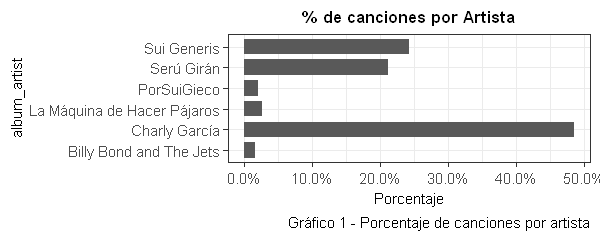

In [10]:
#Grafico 1
# Con frecuencias relativas
options(repr.plot.width=5, repr.plot.height=2)

theme_set(theme_bw())

ggplot(df_charly) + 
  aes(x = album_artist, y = ..count.. / sum(..count..)) + 
  geom_bar(width = 0.75) + 
  coord_flip() + 
  scale_y_continuous("Porcentaje", labels = scales::percent) +
  ggtitle("% de canciones por Artista") +
  labs(caption = 'Gráfico 1 - Porcentaje de canciones por artista') +
  theme(axis.title.x = element_text(size = 9),
        axis.title.y = element_text(size = 9),
        plot.title = element_text(size = 10, hjust = 0.5, face = 'bold')
       ) 

Aquí vemos que casi el 50% de canciones de charly son como solista. Dentro de sus bandas, Sui Generis y Serú Giran son las dos con mas canciones. Analizamos ahora que artistas han tenido mayor impacto, viendo la cantidad de canciones exitosas (forman parte del top 88).

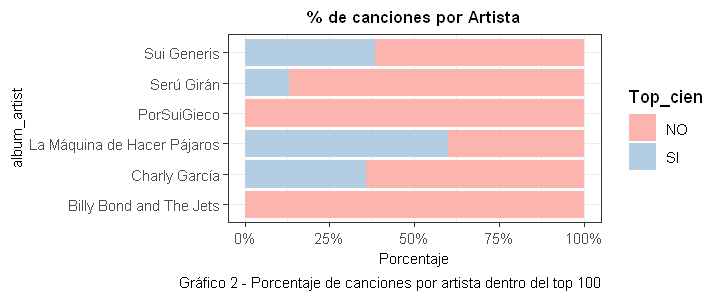

In [11]:
#Grafico 2
# Con frecuencias relativas
options(repr.plot.width=6, repr.plot.height=2.5)

theme_set(theme_bw())

ggplot(df_charly) + 
  aes(x = album_artist, fill = Top_cien ) + 
  geom_bar(position = 'fill') + 
  coord_flip() + 
 scale_y_continuous("Porcentaje", labels = scales::percent) +
   ggtitle("% de canciones por Artista", ) + 
labs(caption = 'Gráfico 2 - Porcentaje de canciones por artista dentro del top 100') +
  theme(axis.title.x = element_text(size = 9),
        axis.title.y = element_text(size = 9),
        plot.title = element_text(size = 10, hjust = 0.5, face = 'bold'))+
scale_fill_brewer(palette = "Pastel1")

Aquí lo que vemos por banda del total de canciones cuantos éxitos tuvieron. Esto nos permite entender cuáles bandas tuvieron mejor reconocimiento teniendo en cuenta la cantidad de canciones total.


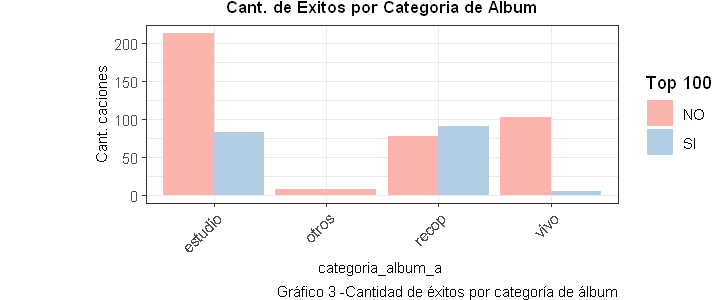

In [12]:
#Grafico 3
options(repr.plot.width=6, repr.plot.height=2.5)

g <- df_charly %>% 
  drop_na(categoria_album_a) %>% 
  ggplot() + 
  aes(x = categoria_album_a, fill = Top_cien) +
  labs(x = "categoria_album_a ", y = "Cant. caciones", 
       fill = "Top 100") +  
  geom_bar(position = "dodge") +
  ggtitle("Cant. de Exitos por Categoria de Album") + 
labs(caption = 'Gráfico 3 -Cantidad de éxitos por categoría de álbum')+
theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  theme(axis.title.x = element_text(size = 9),
        axis.title.y = element_text(size = 9),
        plot.title = element_text(size = 10, hjust = 0.5, face = 'bold'),
        plot.margin=unit(c(0,0,0,2),"cm"))+
scale_fill_brewer(palette = "Pastel1")
plot(g)

Un álbum de estudio es un álbum musical consistente en una selección de canciones grabadas en un estudio de grabación. La diferencia de un álbum de estudio con un álbum recopilatorio (el cual también suele contener canciones de estudio), es que el álbum de estudio incluye temas nuevos grabados por el artista, mientras que el recopilatorio, precisamente compila material publicado con anterioridad y ya conocido.
Al observar que la categoría de los albúmenes recopiladores tiene aproximadamente la misma cantidad de canciones reconocidas como no reconocidas vemos como se organizan en cada álbum.



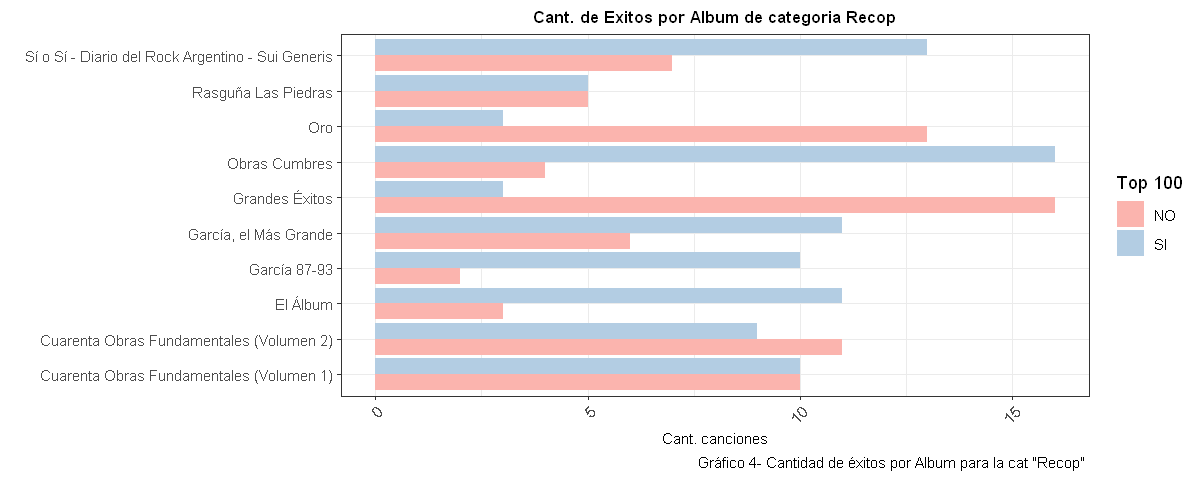

In [13]:
#Grafico 4
options(repr.plot.width=10, repr.plot.height=4)

g <- df_charly %>% 
  filter(categoria_album_a == "recop") %>%
  drop_na(album_name) %>% 
  ggplot() + 
  aes(x = album_name, fill = Top_cien) +
  labs(x = "",
       y = "Cant. canciones", 
       fill = "Top 100") +
labs( caption = 'Gráfico 4- Cantidad de éxitos por Album para la cat "Recop" ') +
  geom_bar(position = "dodge") +
  ggtitle("Cant. de Exitos por Album de categoria Recop") +
scale_fill_brewer(palette = "Pastel1") +
coord_flip() +
 theme(axis.title.x = element_text(size = 9),
        axis.title.y = element_text(size = 7),
        plot.title = element_text(size = 10, hjust = 0.5, face = 'bold'),
       axis.text.x = element_text(angle = 45, hjust = 1)
      ) 

plot(g)

De este gráfico podemos concluir que en la mayoría de los álbumes recopilatorios las cancines reconocidas se combinan con las no reconocidas superando la mitad del álbum. Esto puede ser una estrategía de venta.
Para entender el comportamiento que tiene las variables cuantitativas seleccionadas con respecto a las variables cualitativas comenzamos realizando un BoxPlot:


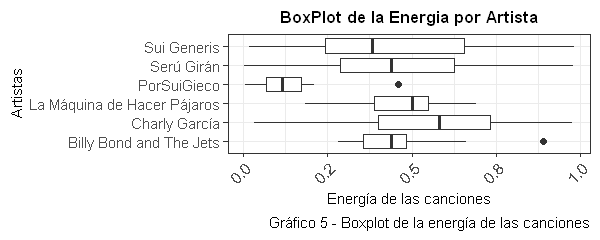

In [14]:
#Grafico 5

options(repr.plot.width=5, repr.plot.height=2)

ggplot(df_charly) +
  aes(x = energy, y = album_artist) +
  geom_boxplot(show.legend = F) +
  labs(x = "Energía de las canciones",
       y = "Artistas",
      caption = 'Gráfico 5 - Boxplot de la energía de las canciones')  +
scale_fill_brewer(palette = "Pastel1") + 
 ggtitle("BoxPlot de la Energia por Artista" )  +
 theme(axis.title.x = element_text(size = 9),
        axis.title.y = element_text(size = 9),
        plot.title = element_text(size = 10, hjust = 0.5, face = 'bold'),
       axis.text.x = element_text(angle = 45, hjust = 1)
      ) 


Aquí podemos ver como la banda PorSuiGieco tiene una energía notablemente menor que el resto.

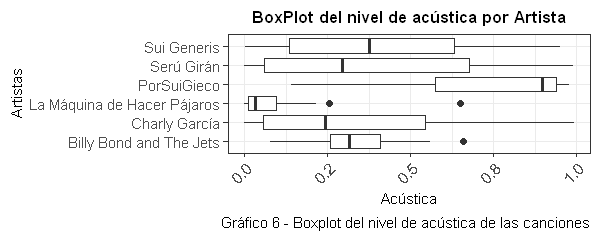

In [15]:
#Grafico 6

options(repr.plot.width=5, repr.plot.height=2)
ggplot(df_charly) +
  aes(x = acousticness, y = album_artist) +
  geom_boxplot(show.legend = F) +
  labs(x = "Acústica", 
       y = "Artistas") +
labs(caption = 'Gráfico 6 - Boxplot del nivel de acústica de las canciones')  +
scale_fill_brewer(palette = "Pastel1") +
 ggtitle("BoxPlot del nivel de acústica por Artista" )  +
 theme(axis.title.x = element_text(size = 9),
        axis.title.y = element_text(size = 9),
        plot.title = element_text(size = 10, hjust = 0.5, face = 'bold'),
       axis.text.x = element_text(angle = 45, hjust = 1)
      ) 


Este boxplot nos muestra que LMDHP tiene un nivel de acústica menor que el resto. En el otro extremo se encuentra PorSuiGieco con un nivel de acústica alto.

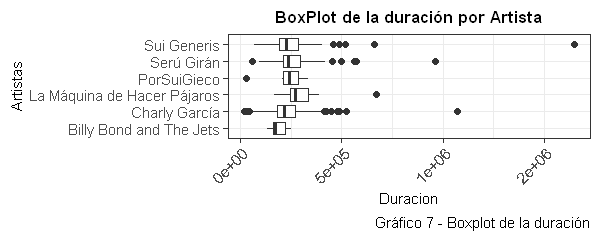

In [16]:
#Grafico 7
options(repr.plot.width=5, repr.plot.height=2)

ggplot(df_charly) +
  aes(x = duration_ms, y = album_artist) +
  geom_boxplot(show.legend = F) +
  labs(x = "Duracion", 
       y = "Artistas") +
labs(caption = 'Gráfico 7 - Boxplot de la duración')  +
scale_fill_brewer(palette = "Pastel1") +
 ggtitle("BoxPlot de la duración por Artista" )  +
 theme(axis.title.x = element_text(size = 9),
        axis.title.y = element_text(size = 9),
        plot.title = element_text(size = 10, hjust = 0.5, face = 'bold'),
       axis.text.x = element_text(angle = 45, hjust = 1)
      ) 


Este boxplot no nos muestra ninguna cuestión atípica en cuando a la duración de las canciones por cada artista.

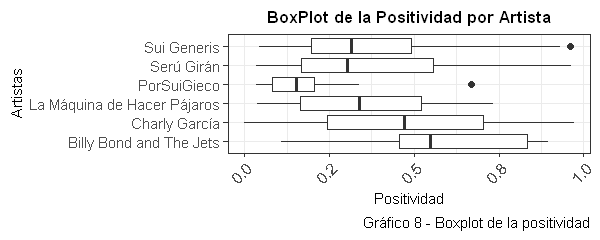

In [17]:
#Grafico 8
options(repr.plot.width=5, repr.plot.height=2)
ggplot(df_charly) +
  aes(x = valence, y = album_artist) +
  geom_boxplot(show.legend = F) +
   labs(x = "Positividad", 
        y = "Artistas" ) +
labs(caption = 'Gráfico 8 - Boxplot de la positividad')  +
scale_fill_brewer(palette = "Pastel1") +
 ggtitle("BoxPlot de la Positividad por Artista" ) +
 theme(axis.title.x = element_text(size = 9),
        axis.title.y = element_text(size = 9),
        plot.title = element_text(size = 10, hjust = 0.5, face = 'bold'),
       axis.text.x = element_text(angle = 45, hjust = 1)
      ) 


Después de haber evaluado el comportamiento de las variables cuantitativas por artista, se puede notar una anomalía en el artista PorSuiGieco que tiene energía y positividad en niveles mucho más bajos que el resto mientras que el nivel de acústica tiene valores notablemente más altos. Esto puede explicar la ausencia de sus canciones en el top 88. 


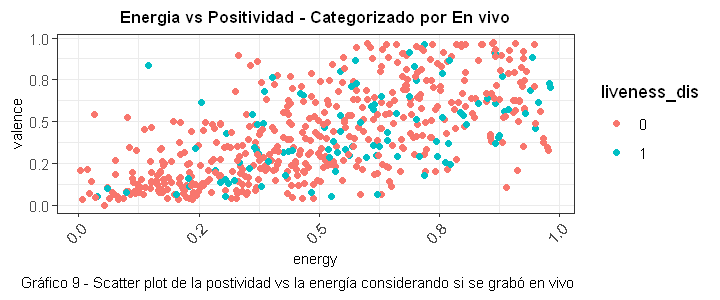

In [18]:
#Grafico 9 
options(repr.plot.width=6, repr.plot.height=2.5)

ggplot(df_charly) +
  aes(x = energy, y = valence ,color = liveness_dis) +
  geom_point() +
  ggtitle("Energia vs Positividad - Categorizado por En vivo") + 
labs(caption = 'Gráfico 9 - Scatter plot de la postividad vs la energía considerando si se grabó en vivo') + 
scale_fill_brewer(palette = "Pastel1") +
 theme(axis.title.x = element_text(size = 9),
        axis.title.y = element_text(size = 9),
        plot.title = element_text(size = 10, hjust = 0.5, face = 'bold'),
       axis.text.x = element_text(angle = 45, hjust = 1)
      ) 

Este gráfico de puntos nos muestra algo que nos esperábamos, que es que a medida que la positividad de la canción es más alta también lo es su energía. El hecho de que la canción haya sido grabada en vivo, hace que no tengamos tantas canciones en vivo que tengan su energía menor a 0.25 y se encuentran en su mayoría por arriba de ese valor.

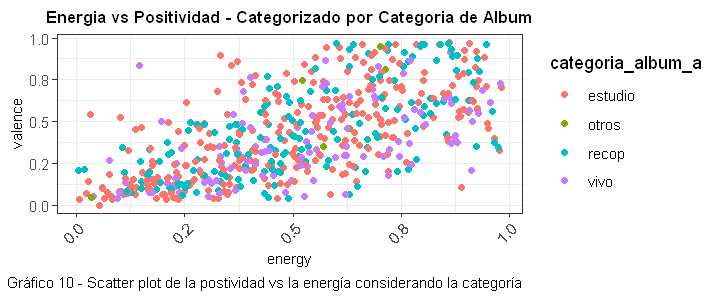

In [19]:
#Grafico 9

options(repr.plot.width=6, repr.plot.height=2.5)


ggplot(df_charly) +
  aes(x = energy, y = valence ,color = categoria_album_a) +
  geom_point() +
  ggtitle("Energia vs Positividad - Categorizado por Categoria de Album") +
 labs(caption = 'Gráfico 10 - Scatter plot de la postividad vs la energía considerando la categoría')+
  scale_fill_brewer(palette = "Pastel1") +
 theme(axis.title.x = element_text(size = 9),
        axis.title.y = element_text(size = 9),
        plot.title = element_text(size = 10, hjust = 0.5, face = 'bold'),
       axis.text.x = element_text(angle = 45, hjust = 1)
      ) 

Vemos ahora lo mismo que antes, pero con los colores marcando el tipo de álbum. No encontramos nada destacable con respecto a estas dos medidas cuando consideramos la categoría del álbum en que se encuentran.

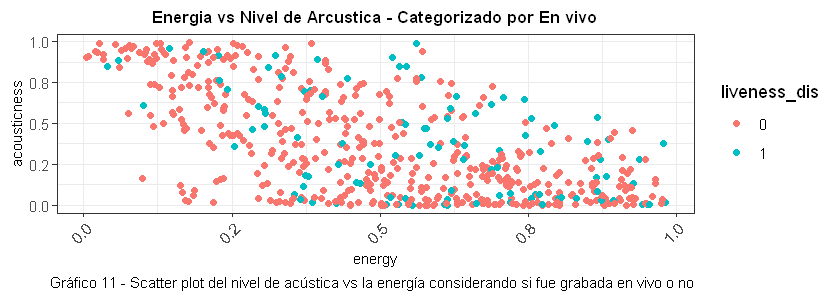

In [20]:
#Grafico 11
options(repr.plot.width=7, repr.plot.height=2.5)

ggplot(df_charly) +
  aes(x = energy, y = acousticness, color = liveness_dis) +
  geom_point() +
ggtitle("Energia vs Nivel de Arcustica - Categorizado por En vivo") +
labs(caption = 'Gráfico 11 - Scatter plot del nivel de acústica vs la energía considerando si fue grabada en vivo o no') +
scale_fill_brewer(palette = "Pastel1") +
 theme(axis.title.x = element_text(size = 9),
        axis.title.y = element_text(size = 9),
        plot.title = element_text(size = 10, hjust = 0.5, face = 'bold'),
       axis.text.x = element_text(angle = 45, hjust = 1)
      ) 


Aquí podemos ver que cuando el nivel de acústica es alto, la energía es mas baja y viceversa. Es decir, están inversamente relacionadas. Cuando consideramos si fue grabada en vivo o no, no encontramos nada destacable.

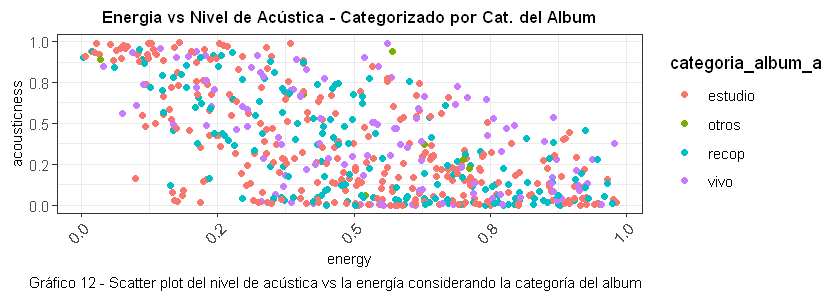

In [21]:
#Grafico 12
options(repr.plot.width=7, repr.plot.height=2.5)
ggplot(df_charly) +
  aes(x = energy, y = acousticness ,color = categoria_album_a) +
  geom_point() +
ggtitle("Energia vs Nivel de Acústica - Categorizado por Cat. del Album") +
labs(caption = 'Gráfico 12 - Scatter plot del nivel de acústica vs la energía considerando la categoría del album') +
  scale_fill_brewer(palette = "Pastel1") +
 theme(axis.title.x = element_text(size = 9),
        axis.title.y = element_text(size = 9),
        plot.title = element_text(size = 10, hjust = 0.5, face = 'bold'),
       axis.text.x = element_text(angle = 45, hjust = 1)
      ) 

Aquí observamos lo mismo que antes, una vez más, la categoría del álbum no tiene influencia en ninguna de estas dos variables numéricas. Podemos destacar también, que tenemos muchas canciones con niveles de acústica bajos, focalizados cerca del cero.

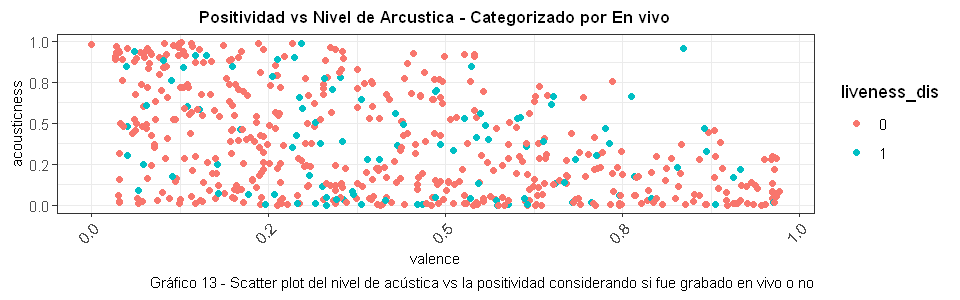

In [22]:
#Grafico 13
options(repr.plot.width=8, repr.plot.height=2.5)

ggplot(df_charly) +
  aes(x = valence, y = acousticness, color = liveness_dis) +
  geom_point() +
ggtitle("Positividad vs Nivel de Arcustica - Categorizado por En vivo") +
labs(caption = 'Gráfico 13 - Scatter plot del nivel de acústica vs la positividad considerando si fue grabado en vivo o no')+
scale_fill_brewer(palette = "Pastel1") +
 theme(axis.title.x = element_text(size = 9),
        axis.title.y = element_text(size = 9),
        plot.title = element_text(size = 10, hjust = 0.5, face = 'bold'),
       axis.text.x = element_text(angle = 45, hjust = 1)
      ) 


Cuando analizamos esta dos variables numéricas en conjunto, ya no encontramos una relacion tan concreta como si vimos entre la energía y la positivdad. Algo que si podemos destacar es que hay pocas canciones con valores altos de positividad y de acústica mientras que si tenemos canciones que tienen valores bajos en ambas (cercanos al 0).

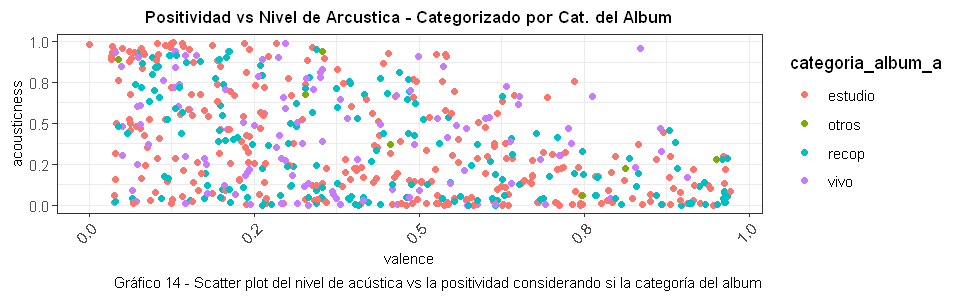

In [23]:
#Grafico 14
options(repr.plot.width=8, repr.plot.height=2.5)

ggplot(df_charly) +
  aes(x = valence, y = acousticness ,color = categoria_album_a) +
  geom_point() +
ggtitle("Positividad vs Nivel de Arcustica - Categorizado por Cat. del Album")+
labs(caption = 'Gráfico 14 - Scatter plot del nivel de acústica vs la positividad considerando si la categoría del album')+
 scale_fill_brewer(palette = "Pastel1") +
 theme(axis.title.x = element_text(size = 9),
        axis.title.y = element_text(size = 9),
        plot.title = element_text(size = 10, hjust = 0.5, face = 'bold'),
       axis.text.x = element_text(angle = 45, hjust = 1)
      ) 


Cuando analizamos lo mencionado antes pero ahora considerando el tipo de álbum no podemos sacar ninguna conclusión que resalte a simple vista.


## Conclusiones

En la primera parte de trabajo analizamos la cantidad de canciones por artista, la cual indica que la mayoría de las canciones de este dataframe la tiene Charly como solista. Esto concuerda con el tiempo que lleva Charly como solista en relación al tiempo que formo parte de una banda. Luego indagamos en cuantos éxitos tuvo cada artista en relación a la cantidad de canciones publicadas. Sorprendiéndonos con La máquina de hacer pájaros que tuvo más del 50 % de éxito. Pero aun lo que más nos atrapo de esta primera parte es como estaban distribuidos los éxitos dentro de las categorías, exponiendo la estrategia de marketing que utilizan cuando conformaron los álbumes recopilatorios. En los cuales, combinan canciones de éxito con canciones no exitosas seguramente para asegurarse la venta. 

En la segunda parte, trabajamos con las variables cuantitativas elegidas dedicándonos a estudiar si existía un comportamiento particular en las canciones exitosas. Notando en los Box Plots que PorSuiGieco, que no tuvo éxitos, se comportaba de manera sesgada con respecto a todas las variables cuantitativas elegidas. Por último, mediante a los scatter plots , pudimos confirma un realización positiva o negativa de algunas variables, no las pudimos vincular con un patrón con Calidad de vivo, ni con la categoría del álbum,  ni si eran exitosa o no.

Concluyendo que no podemos asegurar que rango tiene que poseer una variable para que una canción sea exitosa, ya que no encontramos en los datos un patrón que lo indique. Esto se debe a que hay variables exógenas, como nivel de popularidad, que afectan al éxito de una canción. Pero si notamos que en el contexto actual en el cual no se compra más disco y son populares plataformas como Spotify, no pueden usar más la estrategia de marketing mencionada, y la misma quedara para los libros.
